# Regresion Lineal

En este ejemplo intentaremos adivinar cuantos likes tiene un video de tiktok a partir de la cantidad de vistas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# tiktok vistas y likes de distintos videos

views = [234_000, 8_000, 217_000, 25_000, 62_000, 107_000, 
         140_000, 191_000, 189_000, 496_000, 221_000, 238_000]
likes = [ 39_000,   362,  31_000,  1_500,  4_000,   5_000,   
           6_000,  15_000,  11_000,  30_000,  30_000,  31_000]

In [4]:
df = pd.DataFrame({"Views":views,"Likes":likes})

In [5]:
df.head()

,Views,Likes
0,234000,39000
1,8000,362
2,217000,31000
3,25000,1500
4,62000,4000


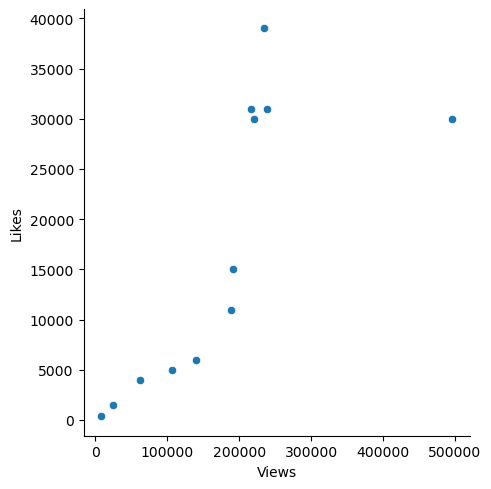

In [6]:
sns.relplot(x="Views",y="Likes", data=df);

## Regresion Lineal

Suponemos que la cantidad de likes es linealmente proporcional a la cantidad de vistas. Por lo tanto buscaremos cual es la funcion que dibuja una linea cuya suma de las distancias a los puntos de nuestra tabla de entrenamiento es la menor posible. Esta linea se puede obtener de forma analitica: https://en.wikipedia.org/wiki/Simple_linear_regression

In [ ]:
df["x - xmean"] = df["Views"] - df["Views"].mean()
df["y - ymean"] = df["Likes"] - df["Likes"].mean()
df["sq(x - xmean)"] = df["x - xmean"] * df["x - xmean"]

In [ ]:
df.head()

Obtengo la pendiente de la linea

In [ ]:
w = np.sum(df["x - xmean"] * df["y - ymean"]) / df["sq(x - xmean)"].sum()

In [ ]:
w

Obtengo la interseccion con el eje y (ordenada al origen)

In [ ]:
b = np.mean(df["Likes"] - w * df["Views"])

In [ ]:
b

In [ ]:
linea = lambda x: w * x + b

In [ ]:
coef = np.polyfit(df["Views"],df["Likes"],1)
linea = np.poly1d(coef)
print(coef)
print(linea)

In [ ]:
sns.relplot(x="Views",y="Likes", data=df)
plt.plot(df["Views"], linea(df["Views"]), '-');

#### Que asumimos para que este medoto funcione correctamente?

- [Linear regression assumptions](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html):

1. [Linealidad](https://es.wikipedia.org/wiki/Recta#Forma_simplificada_de_la_ecuaci%C3%B3n_de_la_recta): La relacion entre X e Y es lineal.
2. [Homocedasticidad](https://es.wikipedia.org/wiki/Heterocedasticidad): La varianza residual es la misma para todos los valores de X. 
3. [Independencia](https://es.wikipedia.org/wiki/Independencia_(probabilidad)): Las observaciones son independientres entre si.
4. [Normalidad](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal): Para todo valor fijo de X, Y tiene una distribucion normal.

Preguntas frecuentes:
- [Is Y normaly distributed](https://stats.stackexchange.com/questions/327427/how-is-y-normally-distributed-in-linear-regression#:~:text=Actually%2C%20your%20y%20scores%20need,the%20assumptions%20of%20linear%20regression.)
- [How multicolinearity affects linear regression](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r)


## Usando la libreria Stats Models

La libreria statsmodels nos permite obtener esta linea de forma mas simple: 

https://www.statsmodels.org/stable/regression.html

In [7]:
import statsmodels.api as sm

x = df[['Views']]
y = df['Likes']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     13.25
Date:                Tue, 13 Feb 2024   Prob (F-statistic):            0.00453
Time:                        12:28:46   Log-Likelihood:                -126.14
No. Observations:                  12   AIC:                             256.3
Df Residuals:                      10   BIC:                             257.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2323.4868   4912.355      0.473      0.6

/Users/hernanamiune/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Usando la libreria Scikit Learn

La libreria sklearn tambien nos permite obtener esta linea de forma simple: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression
X = df.loc[:,["Views"]]
y = df["Likes"]
reg = LinearRegression().fit(X, y)

Obtengo la pendiente de la linea

In [ ]:
reg.coef_

Obtengo la interseccion con el eje y (ordenada al origen)

In [ ]:
reg.intercept_

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/datascience/datascience.html)